# Reading ROMS Output

In [1]:
from roms_tools import Grid, ROMSOutput

For any type of visualization or analysis, we require information about the grid used in the model. We retrieve the grid data using the `Grid.from_file ` method.

In [2]:
grid = Grid.from_file(
    "/glade/derecho/scratch/noraloose/Datasets/ROMSOutput/epac25km_grd.nc"
)

WARNING - Vertical coordinates (Cs_r, Cs_w) not found in grid file.
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.003 seconds
INFO - ========================================================================================================


The `ROMSOutput` class provides a flexible way to load ROMS output files using the `path` parameter, which can be specified in the following ways: 

1. **Single file**: If `path` is a single file, only that file will be loaded.
2. **List of files**: If `path` is a list of file paths, the specified files will be loaded in the given order.
3. **Wildcards**: If `path` contains wildcards (e.g., `*rst*.nc`), matching files are loaded in lexicographic order, assuming this reflects the correct temporal sequence (as is the case for standard ROMS output).

For cases 2 and 3, ROMS-Tools will attempt to concatenate the files along the time dimension. If this is not possible (e.g., due to inconsistent dimensions or metadata), an error may be thrown. 

In the following example, we will read restart files generated during a ROMS simulation. 

## Reading a single file

In [3]:
%%time

roms_output_from_single_file = ROMSOutput(
    grid=grid,
    path="/glade/derecho/scratch/noraloose/Datasets/ROMSOutput/eastpac25km_rst.19980106000000.nc",
    use_dask=True,
)

CPU times: user 345 ms, sys: 101 ms, total: 446 ms
Wall time: 894 ms


<div class="alert alert-info">

Note

In the cell above, we read our ROMS output files with `use_dask = True`. This enables `Dask`, a Python library designated to facilitate scalable, out-of-memory data processing by distributing computations across multiple threads or processes. [Here](https://roms-tools.readthedocs.io/en/latest/using_dask.html) you can learn more about using `Dask` with `ROMS-Tools`.

</div>

The `.ds` attribute contains an `xarray.Dataset` with the data that was read in. As you can see, the restart file contains two time stamps (10 minutes apart).

In [4]:
roms_output_from_single_file.ds

<xarray.Dataset> Size: 1GB
Dimensions:                (time: 2, auxil: 6, eta_rho: 162, xi_rho: 122,
                            xi_u: 121, eta_v: 161, s_rho: 100)
Coordinates:
    abs_time               (time) datetime64[ns] 16B 1998-01-05T23:50:00 1998...
    lon_rho                (eta_rho, xi_rho) float64 158kB ...
    lat_rho                (eta_rho, xi_rho) float64 158kB ...
Dimensions without coordinates: time, auxil, eta_rho, xi_rho, xi_u, eta_v, s_rho
Data variables: (12/55)
    ocean_time             (time) float64 16B dask.array<chunksize=(1,), meta=np.ndarray>
    time_step              (time, auxil) int32 48B dask.array<chunksize=(1, 6), meta=np.ndarray>
    zeta                   (time, eta_rho, xi_rho) float64 316kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    ubar                   (time, eta_rho, xi_u) float64 314kB dask.array<chunksize=(1, 162, 121), meta=np.ndarray>
    vbar                   (time, eta_v, xi_rho) float64 314kB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    MARBL_PH_3D            (time, s_rho, eta_rho, xi_rho) float64 32MB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
    ...                     ...
    DV_avg_bak             (time, eta_v, xi_rho) float64 314kB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    hbls                   (time, eta_rho, xi_rho) float64 316kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    hbbl                   (time, eta_rho, xi_rho) float64 316kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    u_slow                 (time, s_rho, eta_rho, xi_u) float64 31MB dask.array<chunksize=(1, 100, 162, 121), meta=np.ndarray>
    v_slow                 (time, s_rho, eta_v, xi_rho) float64 31MB dask.array<chunksize=(1, 100, 161, 122), meta=np.ndarray>
    p_slow                 (time, s_rho, eta_rho, xi_rho) float64 32MB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
Attributes: (12/35)
    title:                 eastpac25km , 25km resolution
    grid_file:             /pscratch/sd/e/eay/EASTPAC25KM/INPUT_FIXED_TOPO/ep...
    init_file:             /pscratch/sd/e/eay/EASTPAC25KM_spinup/output/eastp...
    ntimes:                4610
    ndtfast:               45
    dt:                    600.0
    ...                    ...
    SRCS:                  SRCS $(shell ls *$(UPF77_ext)) SRCS : $(filter-out...
    CPPS:                  <cppdefs.opt> PACIFIC_PD SOLVE3D UV_ADV UV_COR ADV...
    surf_forcing_strings:  
    bc_options:             OBC_WEST, OBC_NORTH, OBC_SOUTH, OBC_M3ORLANSKI, O...
    git_version:           
    type:                  ROMS restart file

## Reading multiple files

In [5]:
%%time

roms_output_from_two_files = ROMSOutput(
    grid=grid,
    path=[
        "/glade/derecho/scratch/noraloose/Datasets/ROMSOutput/eastpac25km_rst.19980106000000.nc",
        "/glade/derecho/scratch/noraloose/Datasets/ROMSOutput/eastpac25km_rst.19990201000000.nc",
    ],
    use_dask=True,
)

CPU times: user 48.3 ms, sys: 11.7 ms, total: 60 ms
Wall time: 61.3 ms


The two specified restart files were concatenated into a single `xarray.Dataset`, which now contains 4 time stamps.

In [6]:
roms_output_from_two_files.ds

<xarray.Dataset> Size: 3GB
Dimensions:                (time: 4, auxil: 6, eta_rho: 162, xi_rho: 122,
                            xi_u: 121, eta_v: 161, s_rho: 100)
Coordinates:
    abs_time               (time) datetime64[ns] 32B 1998-01-05T23:50:00 ... ...
    lon_rho                (eta_rho, xi_rho) float64 158kB ...
    lat_rho                (eta_rho, xi_rho) float64 158kB ...
Dimensions without coordinates: time, auxil, eta_rho, xi_rho, xi_u, eta_v, s_rho
Data variables: (12/55)
    ocean_time             (time) float64 32B dask.array<chunksize=(1,), meta=np.ndarray>
    time_step              (time, auxil) int32 96B dask.array<chunksize=(1, 6), meta=np.ndarray>
    zeta                   (time, eta_rho, xi_rho) float64 632kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    ubar                   (time, eta_rho, xi_u) float64 627kB dask.array<chunksize=(1, 162, 121), meta=np.ndarray>
    vbar                   (time, eta_v, xi_rho) float64 629kB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    MARBL_PH_3D            (time, s_rho, eta_rho, xi_rho) float64 63MB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
    ...                     ...
    DV_avg_bak             (time, eta_v, xi_rho) float64 629kB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    hbls                   (time, eta_rho, xi_rho) float64 632kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    hbbl                   (time, eta_rho, xi_rho) float64 632kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    u_slow                 (time, s_rho, eta_rho, xi_u) float64 63MB dask.array<chunksize=(1, 100, 162, 121), meta=np.ndarray>
    v_slow                 (time, s_rho, eta_v, xi_rho) float64 63MB dask.array<chunksize=(1, 100, 161, 122), meta=np.ndarray>
    p_slow                 (time, s_rho, eta_rho, xi_rho) float64 63MB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
Attributes: (12/35)
    title:                 eastpac25km , 25km resolution
    grid_file:             /pscratch/sd/e/eay/EASTPAC25KM/INPUT_FIXED_TOPO/ep...
    init_file:             /pscratch/sd/e/eay/EASTPAC25KM_spinup/output/eastp...
    ntimes:                4610
    ndtfast:               45
    dt:                    600.0
    ...                    ...
    SRCS:                  SRCS $(shell ls *$(UPF77_ext)) SRCS : $(filter-out...
    CPPS:                  <cppdefs.opt> PACIFIC_PD SOLVE3D UV_ADV UV_COR ADV...
    surf_forcing_strings:  
    bc_options:             OBC_WEST, OBC_NORTH, OBC_SOUTH, OBC_M3ORLANSKI, O...
    git_version:           
    type:                  ROMS restart file

## Reading files with wildcards

In [7]:
%%time

roms_output = ROMSOutput(
    grid=grid,
    path="/glade/derecho/scratch/noraloose/Datasets/ROMSOutput/*rst*.nc",
    use_dask=True,
)

CPU times: user 7.86 s, sys: 833 ms, total: 8.69 s
Wall time: 9.48 s


The specified directory contains 222 restart files, all of which were concatenated into one dataset. (The concatenation takes some time, even though we used `use_dask = True`.)

In [8]:
roms_output.ds

<xarray.Dataset> Size: 288GB
Dimensions:                (time: 444, auxil: 6, eta_rho: 162, xi_rho: 122,
                            xi_u: 121, eta_v: 161, s_rho: 100)
Coordinates:
    abs_time               (time) datetime64[ns] 4kB 1998-01-05T23:50:00 ... ...
    lon_rho                (eta_rho, xi_rho) float64 158kB ...
    lat_rho                (eta_rho, xi_rho) float64 158kB ...
Dimensions without coordinates: time, auxil, eta_rho, xi_rho, xi_u, eta_v, s_rho
Data variables: (12/55)
    ocean_time             (time) float64 4kB dask.array<chunksize=(1,), meta=np.ndarray>
    time_step              (time, auxil) int32 11kB dask.array<chunksize=(1, 6), meta=np.ndarray>
    zeta                   (time, eta_rho, xi_rho) float64 70MB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    ubar                   (time, eta_rho, xi_u) float64 70MB dask.array<chunksize=(1, 162, 121), meta=np.ndarray>
    vbar                   (time, eta_v, xi_rho) float64 70MB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    MARBL_PH_3D            (time, s_rho, eta_rho, xi_rho) float64 7GB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
    ...                     ...
    DV_avg_bak             (time, eta_v, xi_rho) float64 70MB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    hbls                   (time, eta_rho, xi_rho) float64 70MB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    hbbl                   (time, eta_rho, xi_rho) float64 70MB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    u_slow                 (time, s_rho, eta_rho, xi_u) float64 7GB dask.array<chunksize=(1, 100, 162, 121), meta=np.ndarray>
    v_slow                 (time, s_rho, eta_v, xi_rho) float64 7GB dask.array<chunksize=(1, 100, 161, 122), meta=np.ndarray>
    p_slow                 (time, s_rho, eta_rho, xi_rho) float64 7GB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
Attributes: (12/35)
    title:                 eastpac25km , 25km resolution
    grid_file:             /pscratch/sd/e/eay/EASTPAC25KM/INPUT_FIXED_TOPO/ep...
    init_file:             /pscratch/sd/e/eay/EASTPAC25KM_spinup/output/eastp...
    ntimes:                4610
    ndtfast:               45
    dt:                    600.0
    ...                    ...
    SRCS:                  SRCS $(shell ls *$(UPF77_ext)) SRCS : $(filter-out...
    CPPS:                  <cppdefs.opt> PACIFIC_PD SOLVE3D UV_ADV UV_COR ADV...
    surf_forcing_strings:  
    bc_options:             OBC_WEST, OBC_NORTH, OBC_SOUTH, OBC_M3ORLANSKI, O...
    git_version:           
    type:                  ROMS restart file

Let's verify that the time dimension has been concatenated in a linear sequence.

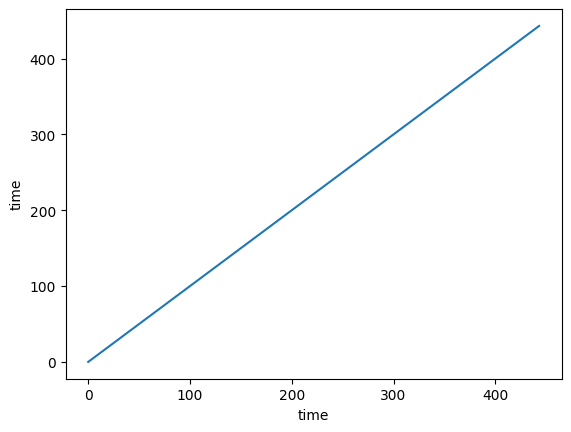

In [9]:
roms_output.ds.time.plot()

## Adjusting the depth for sea surface height

`ROMS` uses a [terrain-following vertical coordinate system](https://roms-tools.readthedocs.io/en/latest/methods.html#vertical-coordinate-system). 
To visualize ROMS output data on a depth coordinate in later notebooks, `ROMS-Tools` internally computes the corresponding depth values.
The treatment of sea surface height (SSH) is controlled by the `adjust_depth_for_sea_surface_height` parameter:

* If `adjust_depth_for_sea_surface_height = False` (default), a constant sea surface height is assumed: $\zeta(x,y,t) = 0$, which corresponds to measuring depth relative to the surface.
* If `adjust_depth_for_sea_surface_height = True`, depth calculations account for spatial and temporal variations in SSH, making the depths time-dependent. This approach corresponds to measuring depth as elevation above the bottom.

For simplicity, the default setting is `adjust_depth_for_sea_surface_height = False`, which has been used so far in this notebook.

Next, we will enable `adjust_depth_for_sea_surface_height = True`.

In [13]:
%%time

roms_output_adjusted_for_ssh = ROMSOutput(
    grid=grid,
    path="/glade/derecho/scratch/noraloose/Datasets/ROMSOutput/*rst*.nc",
    adjust_depth_for_sea_surface_height=True,
    use_dask=True,
)

CPU times: user 9.4 s, sys: 667 ms, total: 10.1 s
Wall time: 12.1 s


While plotting ROMS output is discussed in detail in [this notebook](https://roms-tools.readthedocs.io/en/latest/plotting_roms_output.html), let's make a simple comparison plot to observe how the plots vary slightly depending on whether `adjust_depth_for_sea_surface_height` is set to `True` or `False`.